## Importing Libraries ##

In [68]:
import numpy as np
import pandas as pd
import seaborn as sn


## importing dataset ##

In [70]:
df = pd.read_csv('Train_Data.csv')
df

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,neptune
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,normal
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,normal
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,tcp,http,SF,216,674,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,normal
86841,0,tcp,http,SF,368,1725,0,0,0,0,...,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,normal
86842,28,tcp,ftp,SF,1483,4152,0,0,0,30,...,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,normal
86843,0,tcp,smtp,SF,1679,385,0,0,0,0,...,0.16,0.08,0.00,0.00,0.69,0.00,0.01,0.00,18,normal


## Doing EDA ##

In [71]:
df.dtypes

duration                    int64
protocoltype               object
service                    object
flag                       object
srcbytes                    int64
dstbytes                    int64
land                        int64
wrongfragment               int64
urgent                      int64
hot                         int64
numfailedlogins             int64
loggedin                    int64
numcompromised              int64
rootshell                   int64
suattempted                 int64
numroot                     int64
numfilecreations            int64
numshells                   int64
numaccessfiles              int64
numoutboundcmds             int64
ishostlogin                 int64
isguestlogin                int64
count                       int64
srvcount                    int64
serrorrate                float64
srvserrorrate             float64
rerrorrate                float64
srvrerrorrate             float64
samesrvrate               float64
diffsrvrate   

In [72]:
df.shape

(86845, 43)

In [73]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,neptune
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,normal
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,normal
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,neptune


In [75]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,86845.000000,8.684500e+04,8.684500e+04,86845.000000,86845.0,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,...,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.000046,0.0,0.000035,0.144971,0.000771,0.441142,0.320583,...,123.338269,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522
std,1038.273538,3.582141e+05,5.543041e+04,0.006787,0.0,0.007588,1.837958,0.037009,0.496527,27.993474,...,112.704010,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,77.000000,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,2.000000,77.000000,4.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


<Axes: >

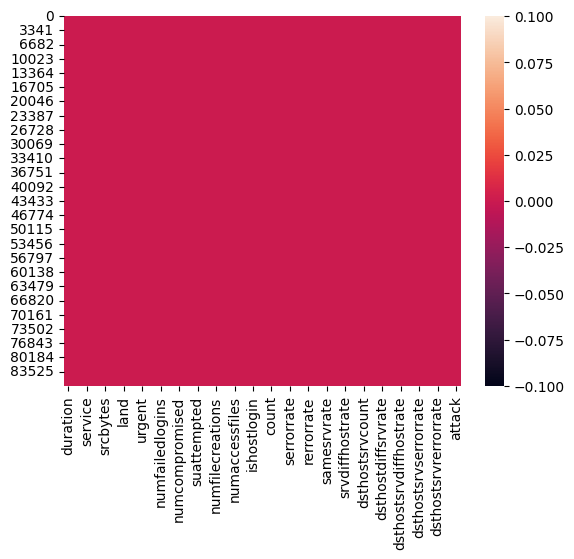

In [76]:
sn.heatmap(df.isnull())

In [77]:
df.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

### No missing values ###

### Now doing Standard Scaling for Numerical features ###

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
exclude_columns = ['flag', 'protocoltype', 'service','attack']
df_exclude = df[exclude_columns]
df_to_scale = df.drop(columns=exclude_columns)
# Fit and transform the data
scaled_data = scaler.fit_transform(df_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=df_to_scale.columns)

# Concatenate the scaled columns and the excluded columns
df = pd.concat([scaled_df, df_exclude], axis=1)


In [80]:
df['protocoltype'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [81]:
df['service'].unique()

array(['netbios_dgm', 'smtp', 'http', 'uucp_path', 'private', 'csnet_ns',
       'hostnames', 'IRC', 'courier', 'ssh', 'Z39_50', 'other',
       'ftp_data', 'efs', 'exec', 'telnet', 'time', 'domain_u', 'auth',
       'iso_tsap', 'http_443', 'nnsp', 'gopher', 'vmnet', 'netstat',
       'whois', 'netbios_ns', 'nntp', 'daytime', 'mtp', 'discard', 'echo',
       'netbios_ssn', 'link', 'pop_3', 'ctf', 'ldap', 'uucp', 'ecr_i',
       'finger', 'systat', 'klogin', 'ftp', 'sunrpc', 'sql_net', 'name',
       'kshell', 'domain', 'imap4', 'urp_i', 'login', 'supdup', 'eco_i',
       'rje', 'ntp_u', 'bgp', 'pop_2', 'printer', 'X11', 'tim_i', 'shell',
       'remote_job', 'urh_i', 'tftp_u', 'red_i'], dtype=object)

In [82]:
df['service'].describe()

count     86845
unique       65
top        http
freq      31505
Name: service, dtype: object

In [83]:
df['flag'].describe()

count     86845
unique       10
top          SF
freq      50672
Name: flag, dtype: object

In [84]:
df['flag'].unique()

array(['REJ', 'SF', 'S0', 'RSTR', 'RSTO', 'S1', 'S3', 'S2', 'SH', 'OTH'],
      dtype=object)

In [85]:
df['flag']

0        REJ
1         SF
2         SF
3         SF
4        REJ
        ... 
86840     SF
86841     SF
86842     SF
86843     SF
86844     SF
Name: flag, Length: 86845, dtype: object

### Doing Label Encoding on Categorical features ###

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_flag = le.fit_transform(df['flag'])
df['flag'] = encoded_flag
df['protocoltype'] = le.fit_transform(df['protocoltype'])
df['service'] = le.fit_transform(df['service'])

In [87]:
data = df.iloc[:, :-1]
data

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,flag,protocoltype,service
0,-0.100328,-0.023605,-0.049289,-0.006787,0.0,-0.004553,-0.078877,-0.020846,-0.888462,-0.011452,...,-0.363793,-0.293940,-0.699276,-0.688094,3.209750,3.229542,0.660945,1,1,33
1,-0.100328,-0.020146,-0.042073,-0.006787,0.0,-0.004553,-0.078877,-0.020846,1.125541,-0.011452,...,-0.363793,-0.293940,-0.462354,-0.688094,-0.256010,-0.323484,-1.449625,8,1,49
2,-0.100328,-0.022986,-0.032241,-0.006787,0.0,-0.004553,-0.078877,-0.020846,1.125541,-0.011452,...,-0.267818,0.248846,-0.699276,-0.688094,-0.326740,-0.323484,0.660945,8,1,22
3,-0.100328,-0.022949,-0.024393,-0.006787,0.0,-0.004553,-0.078877,-0.020846,1.125541,-0.011452,...,-0.363793,-0.293940,-0.699276,-0.688094,-0.326740,-0.323484,0.660945,8,1,22
4,-0.100328,-0.023605,-0.049289,-0.006787,0.0,-0.004553,-0.078877,-0.020846,-0.888462,-0.011452,...,-0.363793,-0.293940,-0.699276,-0.688094,3.209750,3.229542,-0.746102,1,1,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,-0.100328,-0.023002,-0.037130,-0.006787,0.0,-0.004553,-0.078877,-0.020846,1.125541,-0.011452,...,-0.315805,0.248846,-0.677738,-0.666519,-0.326740,-0.323484,0.660945,8,1,22
86841,-0.100328,-0.022578,-0.018169,-0.006787,0.0,-0.004553,-0.078877,-0.020846,1.125541,-0.011452,...,-0.219830,0.610704,-0.699276,-0.688094,0.133004,-0.110303,-0.042578,8,1,22
86842,-0.073360,-0.019465,0.025616,-0.006787,0.0,-0.004553,16.243680,-0.020846,1.125541,-0.011452,...,-0.315805,-0.293940,-0.699276,-0.688094,-0.326740,-0.323484,-0.042578,8,1,18
86843,-0.100328,-0.018918,-0.042343,-0.006787,0.0,-0.004553,-0.078877,-0.020846,1.125541,-0.011452,...,-0.363793,-0.293940,0.786869,-0.688094,-0.291375,-0.323484,-1.449625,8,1,49


<Axes: >

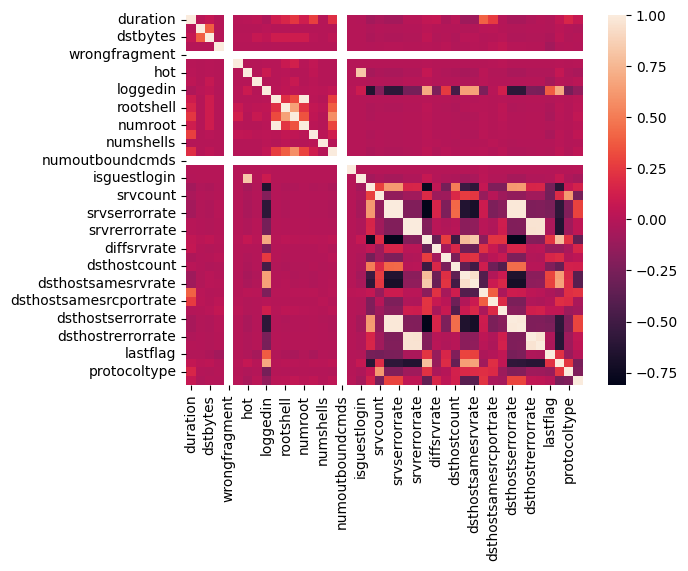

In [88]:
sn.heatmap(data.corr())

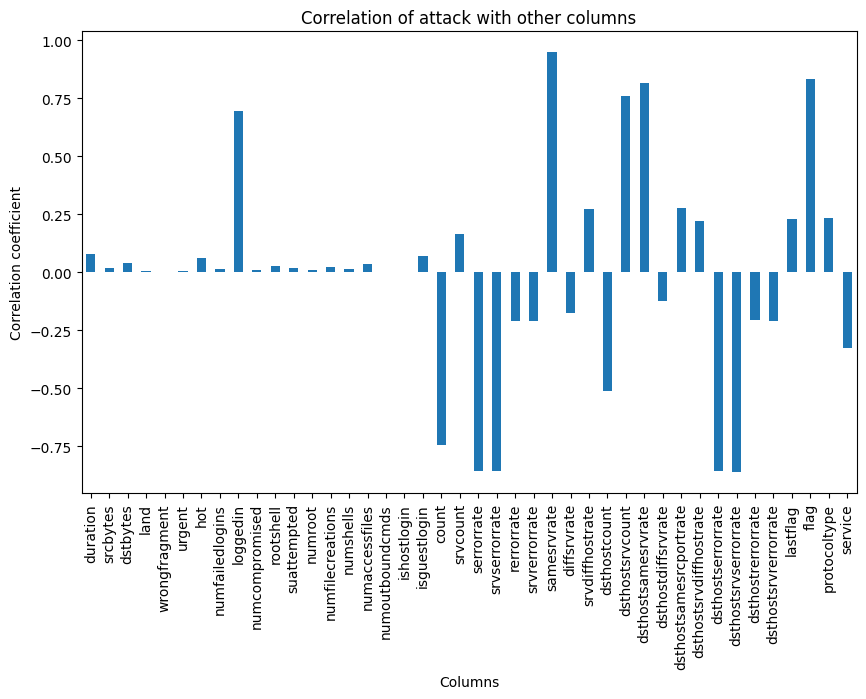

In [89]:
target_column = 'attack'  
df['attack'] = le.fit_transform(df['attack'])
correlation_matrix = df.corr()
target_correlations = correlation_matrix[target_column]
import matplotlib.pyplot as plt
target_correlations.drop(target_column).plot(kind='bar', figsize=(10, 6))
plt.title(f'Correlation of {target_column} with other columns')
plt.xlabel('Columns')
plt.ylabel('Correlation coefficient')
plt.show()

In [90]:
df['attack'].dtype

dtype('int64')

In [189]:
df['attack']

0        0
1        1
2        1
3        1
4        0
        ..
86840    1
86841    1
86842    1
86843    1
86844    1
Name: attack, Length: 86845, dtype: int64

In [91]:
target_correlations.describe()

count    41.000000
mean      0.018160
std       0.467111
min      -0.861819
25%      -0.207083
50%       0.018479
75%       0.219634
max       1.000000
Name: attack, dtype: float64

### Doing feature Engineering to extract important features ###

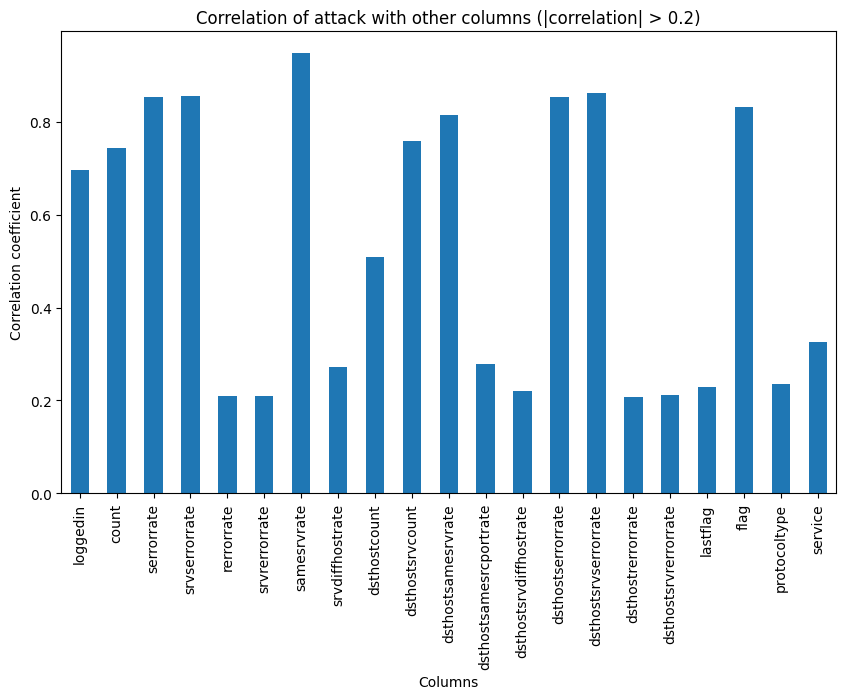

In [92]:
target_correlationsabs = correlation_matrix[target_column].abs()
significant_correlations = target_correlationsabs[target_correlationsabs > 0.2]
significant_correlations = significant_correlations.drop(target_column)
significant_correlations.plot(kind='bar', figsize=(10, 6))
plt.title(f'Correlation of {target_column} with other columns (|correlation| > 0.2)')
plt.xlabel('Columns')
plt.ylabel('Correlation coefficient')
plt.show()

In [93]:
significant_correlations_array = significant_correlations.index.values
print("Columns with significant correlations (|correlation| > 0.2):")
print(significant_correlations)
significant_columns_df = df[significant_correlations_array]
significant_columns_df[target_column] = df[target_column]

Columns with significant correlations (|correlation| > 0.2):
loggedin                  0.695507
count                     0.743357
serrorrate                0.854176
srvserrorrate             0.856142
rerrorrate                0.209675
srvrerrorrate             0.208760
samesrvrate               0.947648
srvdiffhostrate           0.271454
dsthostcount              0.509417
dsthostsrvcount           0.758205
dsthostsamesrvrate        0.813946
dsthostsamesrcportrate    0.278590
dsthostsrvdiffhostrate    0.219634
dsthostserrorrate         0.854428
dsthostsrvserrorrate      0.861819
dsthostrerrorrate         0.207083
dsthostsrvrerrorrate      0.211626
lastflag                  0.229171
flag                      0.832432
protocoltype              0.235430
service                   0.324898
Name: attack, dtype: float64


/tmp/ipykernel_4569/2880430919.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_columns_df[target_column] = df[target_column]


In [94]:
significant_columns_df.head()

,loggedin,count,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,...,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,flag,protocoltype,service,attack
0,-0.888462,2.013053,-0.698029,-0.696459,3.175813,3.179290,-1.325741,-0.353328,0.719026,-0.961269,...,-0.293940,-0.699276,-0.688094,3.20975,3.229542,0.660945,1,1,33,0
1,1.125541,-0.801335,-0.698029,-0.696459,-0.318016,-0.319138,0.810773,-0.353328,0.719026,-0.065111,...,-0.293940,-0.462354,-0.688094,-0.25601,-0.323484,-1.449625,8,1,49,1
2,1.125541,-0.597394,-0.698029,-0.696459,-0.318016,-0.319138,0.810773,0.006648,-1.344626,1.168215,...,0.248846,-0.699276,-0.688094,-0.32674,-0.323484,0.660945,8,1,22,1
3,1.125541,-0.770744,-0.698029,-0.696459,-0.318016,-0.319138,0.810773,-0.353328,0.719026,1.168215,...,-0.293940,-0.699276,-0.688094,-0.32674,-0.323484,0.660945,8,1,22,1
4,-0.888462,1.798915,-0.698029,-0.696459,3.175813,3.179290,-1.415699,-0.353328,0.719026,-1.067743,...,-0.293940,-0.699276,-0.688094,3.20975,3.229542,-0.746102,1,1,62,0


### Using Logistic Regression ###

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

# Load the dataset
# Replace 'your_data.csv' with the path to your dataset
# df = pd.read_csv('your_data.csv')

# Assume 'target' is the name of the target variable column
X = significant_columns_df.drop(columns='attack')
y = significant_columns_df['attack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works with l1 and l2 penalties
}

# Apply GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Train the logistic regression model with the best parameters
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test)
y_pred_train = best_log_reg.predict(X_train)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score in training :")
print(accuracy_score(y_train,y_pred_train))
print("\nAccuracy Score in testing :")
print(accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Confusion Matrix:
[[ 6607     0]
 [    1 10761]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6607
           1       1.00      1.00      1.00     10762

    accuracy                           1.00     17369
   macro avg       1.00      1.00      1.00     17369
weighted avg       1.00      1.00      1.00     17369


Accuracy Score in training :
0.9999712130807761

Accuracy Score in testing :
0.9999424261615522


In [96]:
results_df = pd.DataFrame(grid_search.cv_results_)
print("\nAll parameter combinations with their respective accuracies:")
print(results_df[['param_C', 'param_penalty', 'mean_test_score']])


All parameter combinations with their respective accuracies:
  param_C param_penalty  mean_test_score
0     0.1            l1         0.999885
1     0.1            l2         0.999784
2       1            l1         0.999899
3       1            l2         0.999870
4      10            l1         0.999899
5      10            l2         0.999885
6     100            l1         0.999899
7     100            l2         0.999870


### Using Decision Trees ###

In [97]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Apply GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Get accuracy of all parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)
print("\nAll parameter combinations with their respective accuracies:")
print(results_df[['param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']])

# Train the Decision Tree model with the best parameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt.predict(X_test)
y_pred_train = best_dt.predict(X_train)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score in training :")
print(accuracy_score(y_train, y_pred_train))
print("\nAccuracy Score in testing :")
print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

All parameter combinations with their respective accuracies:
    param_criterion param_max_depth param_min_samples_split   
0              gini            None                       2  \
1              gini            None                       5   
2              gini            None                      10   
3              gini            None                       2   
4              gini            None                       5   
..              ...             ...                     ...   
103         entropy              50                       5   
104         entropy              50                      10   
105         entropy              50                       2   
106         entropy              50                       5   
107         entropy              50                      10   

   

### Random Forest ###

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
X = significant_columns_df.drop(columns='attack')
y = significant_columns_df['attack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Apply GridSearchCV to find the best parameters
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=5, verbose=1, n_jobs=-1,n_iter=100)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Get accuracy of all parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)
print("\nAll parameter combinations with their respective accuracies:")
print(results_df[['param_n_estimators', 'param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']])

# Train the Random Forest model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)
y_pred_train = best_rf.predict(X_train)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score in training :")
print(accuracy_score(y_train, y_pred_train))
print("\nAccuracy Score in testing :")
print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}

All parameter combinations with their respective accuracies:
   param_n_estimators param_criterion param_max_depth param_min_samples_split   
0                 100         entropy              20                      10  \
1                 100         entropy              20                      10   
2                 100            gini              50                      10   
3                 100            gini              30                       2   
4                 100         entropy              20                       5   
..                ...             ...             ...                     ...   
95                200         entropy              50                       5   
96                 50         entropy              30                       5   
97         

In [ ]:
rf2 = RandomForestClassifier(n_estimators=100,min_samples_split=10,min_samples_leaf=1,max_depth=20,criterion='entropy')
rf2.fit(X_train,y_train)
yredrf = rf2.predict(X_test)
print(accuracy_score(y_test,yredrf))

### neural Network ###

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
# Replace 'your_data.csv' with the path to your dataset
# df = pd.read_csv('your_data.csv')

# Assume 'target' is the name of the target variable column
X = significant_columns_df.drop(columns='attack')
y = significant_columns_df['attack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLPClassifier model
mlp = MLPClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Apply GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Get accuracy of all parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)
print("\nAll parameter combinations with their respective accuracies:")
print(results_df[['param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_alpha', 'param_learning_rate', 'mean_test_score']])

# Train the MLPClassifier model with the best parameters
best_mlp = grid_search.best_estimator_
best_mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_mlp.predict(X_test)
y_pred_train = best_mlp.predict(X_train)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score in training :")
print(accuracy_score(y_train, y_pred_train))
print("\nAccuracy Score in testing :")
print(accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/mayank/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mayank/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mayank/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}

All parameter combinations with their respective accuracies:
   param_hidden_layer_sizes param_activation param_solver param_alpha   
0              (50, 50, 50)             tanh          sgd      0.0001  \
1              (50, 50, 50)             tanh         adam      0.0001   
2              (50, 50, 50)             tanh          sgd      0.0001   
3              (50, 50, 50)             tanh         adam      0.0001   
4             (50, 100, 50)             tanh          sgd      0.0001   
5             (50, 100, 50)             tanh         adam      0.0001   
6             (50, 100, 50)             tanh          sgd      0.0001   
7             (50, 100, 50)             tanh         adam      0.0001   
8                    (100,)             tanh          sgd      0.0001   
9                    (100,)             tanh         adam   

## Now making all models of the best paramters found using Hyperparameter Tuning using GridSearchCV method ##

### Neural network model ###

In [102]:
mlp2 = MLPClassifier(random_state=42,activation='tanh',hidden_layer_sizes=(50,100,50),alpha=0.0001,learning_rate='constant',solver='adam')
X = significant_columns_df.drop(columns='attack')
y = significant_columns_df['attack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlp2.fit(X_train,y_train)
ypredm = mlp2.predict(X_test)
print(accuracy_score(y_test,ypredm))


1.0


### Random Forest Model ###

In [101]:
rf2 = RandomForestClassifier(n_estimators=100,min_samples_split=10,min_samples_leaf=1,max_depth=20,criterion='entropy')
X = significant_columns_df.drop(columns='attack')
y = significant_columns_df['attack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf2.fit(X_train,y_train)
yredrf = rf2.predict(X_test)
print(accuracy_score(y_test,yredrf))

1.0


### SVM model ###

In [104]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
X = significant_columns_df.drop(columns='attack')
y = significant_columns_df['attack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc.fit(X_train,y_train)
ypredsvc = svc.predict(X_test)
print(accuracy_score(y_test,ypredsvc))


0.9995969831308653


## Loading Test dataset ##

In [105]:
test = pd.read_csv('Test_Data.csv')
test.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
0,0,tcp,mtp,REJ,0,0,0,0,0,0,...,7,0.03,0.08,0.0,0.0,0.0,0.0,1.0,1.0,20
1,0,tcp,http,SF,199,1721,0,0,0,0,...,255,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,21
2,0,tcp,discard,S0,0,0,0,0,0,0,...,14,0.05,0.09,0.0,0.0,1.0,1.0,0.0,0.0,18
3,0,tcp,telnet,S0,0,0,0,0,0,0,...,2,0.01,0.09,0.0,0.0,1.0,1.0,0.0,0.0,18
4,0,tcp,exec,S0,0,0,0,0,0,0,...,16,0.06,0.06,0.0,0.0,1.0,1.0,0.0,0.0,20


In [106]:
testnew = test[significant_correlations_array]
testnew.head()

,loggedin,count,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,...,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,flag,protocoltype,service
0,0,249,0.0,0.0,1.0,1.0,0.03,0.0,255,7,...,0.0,0.0,0.0,0.0,1.0,1.0,20,REJ,tcp,mtp
1,1,9,0.0,0.0,0.0,0.0,1.00,0.2,255,255,...,0.0,0.0,0.0,0.0,0.0,0.0,21,SF,tcp,http
2,0,16,1.0,1.0,0.0,0.0,0.38,0.0,255,14,...,0.0,0.0,1.0,1.0,0.0,0.0,18,S0,tcp,discard
3,0,297,1.0,1.0,0.0,0.0,0.03,0.0,255,2,...,0.0,0.0,1.0,1.0,0.0,0.0,18,S0,tcp,telnet
4,0,104,1.0,1.0,0.0,0.0,0.18,0.0,255,16,...,0.0,0.0,1.0,1.0,0.0,0.0,20,S0,tcp,exec


In [107]:
testnew.shape

(21712, 21)

### Doing scaling and encoding on it also ###

In [113]:
exclude_columns2 = ['flag', 'protocoltype', 'service']
df_exclude = testnew[exclude_columns2]
df_to_scale = testnew.drop(columns=exclude_columns2)
# Fit and transform the data
scaled_data = scaler.fit_transform(df_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=df_to_scale.columns)

# Concatenate the scaled columns and the excluded columns
testnew = pd.concat([scaled_df, df_exclude], axis=1)

In [114]:
testnew['flag'] = le.fit_transform(testnew['flag'])
testnew['protocoltype'] = le.fit_transform(testnew['protocoltype'])
testnew['service'] = le.fit_transform(testnew['service'])

In [115]:
testnew.head(10)

,loggedin,count,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,...,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,flag,protocoltype,service
0,-0.885885,1.723356,-0.694791,-0.693507,3.171393,3.175193,-1.375217,-0.355410,0.725700,-1.036777,...,-0.368024,-0.286865,-0.696242,-0.685422,3.213051,3.220470,-0.043208,1,1,31
1,1.128815,-0.718292,-0.694791,-0.693507,-0.318236,-0.318860,0.808557,0.531415,0.725700,1.164709,...,-0.368024,-0.286865,-0.696242,-0.685422,-0.326777,-0.325015,0.660574,8,1,22
2,-0.885885,-0.647077,1.458041,1.460841,-0.318236,-0.318860,-0.587258,-0.355410,0.725700,-0.974638,...,-0.368024,-0.286865,1.461138,1.474393,-0.326777,-0.325015,-1.450774,4,1,9
3,-0.885885,2.211686,1.458041,1.460841,-0.318236,-0.318860,-1.375217,-0.355410,0.725700,-1.081161,...,-0.368024,-0.286865,1.461138,1.474393,-0.326777,-0.325015,-1.450774,4,1,55
4,-0.885885,0.248194,1.458041,1.460841,-0.318236,-0.318860,-1.037520,-0.355410,0.725700,-0.956884,...,-0.368024,-0.286865,1.461138,1.474393,-0.326777,-0.325015,-0.043208,4,1,16
5,-0.885885,0.644961,1.458041,1.460841,-0.318236,-0.318860,-1.285165,-0.355410,0.725700,-1.027900,...,-0.368024,-0.286865,1.461138,1.474393,-0.326777,-0.325015,-0.043208,4,1,26
6,1.128815,-0.769160,-0.694791,-0.693507,-0.318236,-0.318860,0.808557,1.418239,0.725700,1.164709,...,-0.368024,-0.286865,-0.696242,-0.685422,-0.326777,-0.325015,0.660574,8,1,22
7,1.128815,-0.779333,-0.694791,-0.693507,-0.318236,-0.318860,0.808557,-0.355410,-1.579787,1.164709,...,-0.225698,1.225415,-0.696242,-0.685422,-0.326777,-0.325015,0.660574,8,1,22
8,-0.885885,2.170992,1.458041,1.460841,-0.318236,-0.318860,-1.307678,-0.355410,0.725700,-0.939130,...,-0.368024,-0.286865,1.461138,1.474393,-0.326777,-0.325015,0.660574,4,1,8
9,-0.885885,0.400797,1.458041,1.460841,-0.318236,-0.318860,-1.375217,-0.355410,0.725700,-1.063407,...,-0.368024,-0.286865,1.461138,1.474393,-0.326777,-0.325015,-0.043208,4,1,15


In [128]:
testnew.shape

(21712, 21)

## Now for each model we do 20 iterations and find the output of test dataset and use mode to get most predicted output and also storing accuracy after training ##

### For Random Forest ###

In [153]:
predictions1 = []
acc = []
X = significant_columns_df.drop(columns='attack')
y = significant_columns_df['attack']
for i in range(20):
    # Split the training data if needed (otherwise skip this line)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize and train your model
    model = RandomForestClassifier(n_estimators=100,min_samples_split=10,min_samples_leaf=1,max_depth=20,criterion='entropy')  # Replace with your model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    preds = model.predict(X_test)
    acc.append(accuracy_score(y_test,preds))
    prednew = model.predict(testnew)
    predictions1.append(prednew)

# Convert predictions list to a DataFrame
predictions_df_rf = pd.DataFrame(predictions1).T

In [154]:
acc

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999424261615522,
 1.0,
 1.0,
 1.0,
 0.9998848523231044,
 1.0]

In [155]:
predictions_df_rf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
predictions_df_rf.shape

(21712, 20)

In [157]:
final_predictions = predictions_df_rf.mode(axis=1)
print(final_predictions)

       0
0      0
1      1
2      0
3      0
4      0
...   ..
21707  1
21708  1
21709  0
21710  1
21711  0

[21712 rows x 1 columns]


In [158]:
final_predictions = predictions_df_rf.mode(axis=1)
final_predictions_rf = pd.DataFrame(final_predictions, columns=['Final_Prediction'])
# Calculate how many predictions vary among the 10 runs
comparison = predictions_df_rf.apply(lambda row: len(set(row)) > 1, axis=1)
num_vary = comparison.sum()

print(f"Number of varying predictions: {num_vary}")


Number of varying predictions: 3


In [159]:
comparison

0        False
1        False
2        False
3        False
4        False
         ...  
21707    False
21708    False
21709    False
21710    False
21711    False
Length: 21712, dtype: bool

In [160]:
predictions_df_rf[comparison]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
16085,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
17542,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1
19772,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1


### For Neural Network model ###

In [161]:
predictions2 = []
acc2 = []
X = significant_columns_df.drop(columns='attack')
y = significant_columns_df['attack']
for i in range(20):
    # Split the training data if needed (otherwise skip this line)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize and train your model
    model = MLPClassifier(random_state=42,activation='tanh',hidden_layer_sizes=(50,100,50),alpha=0.0001,learning_rate='constant',solver='adam')  # Replace with your model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    preds = model.predict(X_test)
    acc2.append(accuracy_score(y_test,preds))
    prednew = model.predict(testnew)
    predictions2.append(prednew)

# Convert predictions list to a DataFrame
predictions_df_nn = pd.DataFrame(predictions2).T

In [162]:
acc2

[1.0,
 0.9999424261615522,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999424261615522,
 1.0,
 0.9999424261615522,
 1.0,
 1.0,
 0.9998848523231044,
 0.9999424261615522,
 0.9998272784846566,
 1.0,
 0.9999424261615522,
 1.0,
 1.0,
 0.9999424261615522]

In [163]:
final_predictions2 = predictions_df_nn.mode(axis=1)
final_predictions_nn = pd.DataFrame(final_predictions2, columns=['Final_Prediction'])
# Calculate how many predictions vary among the 10 runs
comparison = predictions_df_nn.apply(lambda row: len(set(row)) > 1, axis=1)
num_vary = comparison.sum()

print(f"Number of varying predictions: {num_vary}")


Number of varying predictions: 4


In [164]:
predictions_df_nn[comparison]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
15411,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0
16085,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1
17542,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,0
19772,0,0,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,0,0


### For SVM model ###

In [165]:
predictions3 = []
acc3 = []
X = significant_columns_df.drop(columns='attack')
y = significant_columns_df['attack']
for i in range(20):
    # Split the training data if needed (otherwise skip this line)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize and train your model
    model = SVC(random_state=42)  # Replace with your model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    preds = model.predict(X_test)
    acc3.append(accuracy_score(y_test,preds))
    prednew = model.predict(testnew)
    predictions3.append(prednew)

# Convert predictions list to a DataFrame
predictions_df_svc = pd.DataFrame(predictions3).T

In [166]:
acc3

[0.9997697046462087,
 0.9997697046462087,
 0.9997697046462087,
 0.9997697046462087,
 0.9994818354539697,
 0.9998272784846566,
 0.9997697046462087,
 0.9998848523231044,
 0.9997697046462087,
 0.9998848523231044,
 0.9995969831308653,
 0.9995969831308653,
 0.9997697046462087,
 0.9995969831308653,
 0.9996545569693132,
 0.999712130807761,
 0.9996545569693132,
 0.9997697046462087,
 0.9995969831308653,
 0.9998848523231044]

In [167]:
final_predictions3 = predictions_df_svc.mode(axis=1)
final_predictions_svc = pd.DataFrame(final_predictions3, columns=['Final_Prediction'])
# Calculate how many predictions vary among the 10 runs
comparison = predictions_df_svc.apply(lambda row: len(set(row)) > 1, axis=1)
num_vary = comparison.sum()

print(f"Number of varying predictions: {num_vary}")


Number of varying predictions: 3


### For Logistic Regression Model ###

In [171]:
predictions4 = []
acc4 = []
X = significant_columns_df.drop(columns='attack')
y = significant_columns_df['attack']
for i in range(20):
    # Split the training data if needed (otherwise skip this line)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize and train your model
    model = LogisticRegression(random_state=42,C=1,penalty='l1',solver='liblinear')  # Replace with your model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    preds = model.predict(X_test)
    acc4.append(accuracy_score(y_test,preds))
    prednew = model.predict(testnew)
    predictions4.append(prednew)

# Convert predictions list to a DataFrame
predictions_df_lr = pd.DataFrame(predictions4).T
final_predictions4 = predictions_df_lr.mode(axis=1)
final_predictions_lr = pd.DataFrame(final_predictions4, columns=['Final_Prediction'])
# Calculate how many predictions vary among the 10 runs
comparison = predictions_df_lr.apply(lambda row: len(set(row)) > 1, axis=1)
num_vary = comparison.sum()

print(f"Number of varying predictions: {num_vary}")



Number of varying predictions: 1


In [176]:
acc4

[0.9998848523231044,
 1.0,
 0.9999424261615522,
 0.9998848523231044,
 1.0,
 0.9999424261615522,
 0.9999424261615522,
 0.9998848523231044,
 0.9998272784846566,
 0.9999424261615522,
 0.9999424261615522,
 1.0,
 0.9999424261615522,
 0.9999424261615522,
 0.9999424261615522,
 0.9998848523231044,
 0.9999424261615522,
 0.9997697046462087,
 0.9998848523231044,
 0.9999424261615522]

In [172]:
predictions_df_lr[comparison]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
10356,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### For Decision tree ###

In [173]:
predictions5 = []
acc5 = []
X = significant_columns_df.drop(columns='attack')
y = significant_columns_df['attack']
for i in range(20):
    # Split the training data if needed (otherwise skip this line)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize and train your model
    model = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=1,min_samples_split=2)  # Replace with your model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    preds = model.predict(X_test)
    acc5.append(accuracy_score(y_test,preds))
    prednew = model.predict(testnew)
    predictions5.append(prednew)

# Convert predictions list to a DataFrame
predictions_df_dt = pd.DataFrame(predictions5).T
final_predictions5 = predictions_df_dt.mode(axis=1)
final_predictions_dt = pd.DataFrame(final_predictions5, columns=['Final_Prediction'])
# Calculate how many predictions vary among the 10 runs
comparison = predictions_df_dt.apply(lambda row: len(set(row)) > 1, axis=1)
num_vary = comparison.sum()

print(f"Number of varying predictions: {num_vary}")



Number of varying predictions: 10


In [175]:
acc5

[1.0,
 0.9999424261615522,
 0.9998848523231044,
 0.9998848523231044,
 0.9996545569693132,
 0.9998848523231044,
 0.9997697046462087,
 0.9997697046462087,
 0.999712130807761,
 0.9997697046462087,
 0.9999424261615522,
 1.0,
 0.9998272784846566,
 0.9998272784846566,
 0.9998272784846566,
 0.9999424261615522,
 0.9999424261615522,
 0.9995394092924176,
 0.999712130807761,
 0.9998848523231044]

In [174]:
predictions_df_dt[comparison]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
4828,1,0,1,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,1
8952,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
10356,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1
11309,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
13423,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
14392,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
15411,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0
16085,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17542,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0
19772,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0


In [177]:
predictions_df_dt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [182]:
def row_mode(row):
    return row.mode()[0]

# Apply the function row-wise
modedt = predictions_df_dt.apply(row_mode, axis=1)
moderf = predictions_df_rf.apply(row_mode,axis= 1)
modesvc = predictions_df_svc.apply(row_mode,axis=1)
modelr = predictions_df_lr.apply(row_mode,axis=1)
modenn = predictions_df_nn.apply(row_mode,axis=1)


In [186]:
final = pd.concat([modedt,modelr,modenn,moderf,modesvc],axis=1,keys=['DT','LR','NN','RF','SVM'])
final.head(10)

,DT,LR,NN,RF,SVM
0,0,0,0,0,0
1,1,1,1,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,1,1,1,1,1
7,1,1,1,1,1
8,0,0,0,0,0
9,0,0,0,0,0


In [187]:
comparison = final.apply(lambda row: len(set(row)) > 1, axis=1)
num_vary = comparison.sum()

print(f"Number of varying predictions: {num_vary}")

Number of varying predictions: 10


In [188]:
final[comparison]

,DT,LR,NN,RF,SVM
450,0,1,1,1,1
3423,1,1,1,1,0
4828,1,1,0,0,0
8820,1,0,0,1,0
15411,0,1,1,1,1
16085,0,1,1,0,0
17158,0,0,0,0,1
17542,0,0,1,1,1
18847,1,1,1,1,0
19772,0,0,1,1,1


In [199]:
finalpred = final.apply(row_mode, axis=1)
finalpred = pd.DataFrame(finalpred,columns=['attack'])
finalpred.head()

,attack
0,0
1,1
2,0
3,0
4,0


In [200]:
mapping = {0: 'neptune', 1: 'normal'}
finalpred['attack'] = finalpred['attack'].replace(mapping)

In [201]:
finalpred.head()

,attack
0,neptune
1,normal
2,neptune
3,neptune
4,neptune


In [204]:
mapping = {'normal': 0, 'neptune':1}
finalpred['attack'] = finalpred['attack'].replace(mapping)
finalpred.head()

,attack
0,1
1,0
2,1
3,1
4,1


In [205]:
finalpred['attack'].to_csv('predictions.csv',index=False)

In [210]:
X = significant_columns_df.drop(columns='attack')
y = significant_columns_df['attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression(C=1,penalty='l1',solver='liblinear')  # Replace with your model
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(accuracy_score(y_test,preds))
prednew = model.predict(testnew)
final_predictions_l = pd.DataFrame(prednew, columns=['attack'])



0.9999232363552621


In [208]:
final_predictions_l

,Final_Prediction
0,0
1,1
2,0
3,0
4,0
...,...
21707,1
21708,1
21709,0
21710,1


In [211]:
mapping = {0: 'neptune', 1: 'normal'}
final_predictions_l['attack'] = final_predictions_l['attack'].replace(mapping)

In [212]:
final_predictions_l

,attack
0,neptune
1,normal
2,neptune
3,neptune
4,neptune
...,...
21707,normal
21708,normal
21709,neptune
21710,normal


In [213]:
mapping = {'normal': 0, 'neptune':1}
final_predictions_l['attack'] = final_predictions_lr['attack'].replace(mapping)
finalpred.head()

,attack
0,1
1,0
2,1
3,1
4,1


In [216]:
moderf.head()

0    0
1    1
2    0
3    0
4    0
dtype: int64

In [218]:
finall = pd.DataFrame(moderf, columns=['attack'])
mapping = {0: 'neptune', 1: 'normal'}
finall['attack'] = finall['attack'].replace(mapping)
mapping2 = {'normal': 0, 'neptune':1}
finall['attack'] = finall['attack'].replace(mapping2)
finall.head()

,attack
0,1
1,0
2,1
3,1
4,1


In [219]:
finall['attack'].to_csv('submission.csv',index=False)

### So now finally in<br>
submission.csv - we have results from Random Forest Model , Accuracy - 100%<br>
submission2.csv - we have results from Mode of all Models , Accuracy - 99.98% <br>
submission3.csv - we have results from Neural Network Model , Accuracy - 99.97% <br> 